In [25]:
import nltk
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from collections import Counter
import os
import glob

%matplotlib inline

In [6]:
fil = open("../data/convote_v1.1/data_stage_one/development_set/052_400011_0327014_DON.txt", 'r')
statinfo = os.stat("../data/convote_v1.1/data_stage_one/development_set/052_400011_0327014_DON.txt")
print(int(statinfo.st_size))

5776


In [20]:
#putting all of the convote stage one data into a pandas dataframe
path = "../data/convote_v1.1/data_stage_one/development_set/"
df = pd.DataFrame([[1, 2, 'stuff']], columns=['Party', 'Size', 'Speech'])
i = 0
for filename in glob.glob(os.path.join(path, '*.txt')):
    tempFil = open(filename, 'r')
    indicator = (filename[-7:-4])
    statinfo = os.stat(filename)
    s = int(statinfo.st_size)
    party = 0
    #democrat = 0, republican = 1
    if indicator[0] == 'D':
        party = 0
    else:
        party = 1
    df.loc[i] = ([party, s, tempFil.read()])
    i += 1  

Total Democrats in Dataframe:  335
Total Republicans in Dataframe:  367
Average Word count of speeches in Dataframe:  1678.2549857549857
Average Word count of Democratic speeches in Dataframe: 1970.2149253731343
Average Word count of Republican speeches in Dataframe: 1411.7520435967303


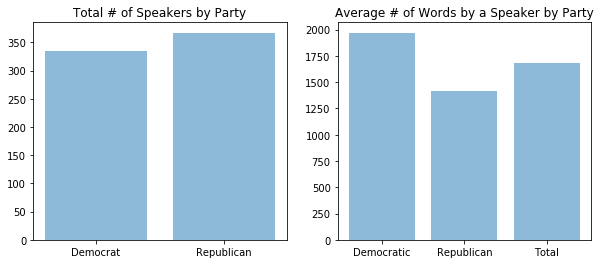

In [33]:
#note use iloc for indexing stuff, read more about it in pandas doc, exampleSpeech = df.iloc[0]['Speech']
#first get some stats about the speeches

def getTotalAverages(df):
    """
    This function goes through the pandas dataframe to calculate the averages of the total dataframe.
    These averages include, length of speeches, total democrats, total republicans
    df: a pandas dataframe
    """
    totalDem, totalRepub, averageWordCount, averageDemWord, averageRepubWord = 0, 0, 0, 0, 0
    
    for index, row in df.iterrows():
        if row["Party"] == 0: 
            totalDem += 1
            averageWordCount += len(row["Speech"])
            averageDemWord += len(row["Speech"])
        else: 
            totalRepub += 1
            averageWordCount += len(row["Speech"])
            averageRepubWord += len(row["Speech"])
            
    print("Total Democrats in Dataframe: ", totalDem)
    print("Total Republicans in Dataframe: ", totalRepub)
    print("Average Word count of speeches in Dataframe: ", (averageWordCount/(totalDem + totalRepub)))
    print("Average Word count of Democratic speeches in Dataframe:", (averageDemWord/(totalDem)))
    print("Average Word count of Republican speeches in Dataframe:", (averageRepubWord/(totalRepub)))
    
    #plotting these 
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    axs[0].bar(['Democrat', 'Republican'], [totalDem, totalRepub], align='center', alpha=0.5)
    axs[0].set_title('Total # of Speakers by Party')
    axs[1].bar(['Total', 'Democratic', 'Republican'], 
                   [(averageWordCount/(totalDem + totalRepub)), (averageDemWord/(totalDem)), (averageRepubWord/(totalRepub))],
                   align='center', alpha=0.5)
    axs[1].set_title('Average # of Words by a Speaker by Party')
        
getTotalAverages(df)

In [34]:
#Generate word cloud section
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

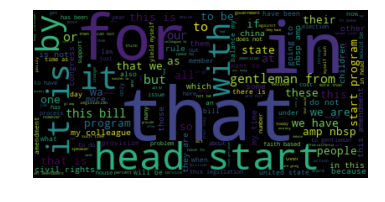

In [40]:
#basic, I might want to do some cleaning of the corpus before I generate the word cloud
text = " ".join(review for review in df.Speech)
wordcloud = WordCloud(stopwords=['mr', 'chairman', 'and', 'of', 'on', 'the']).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

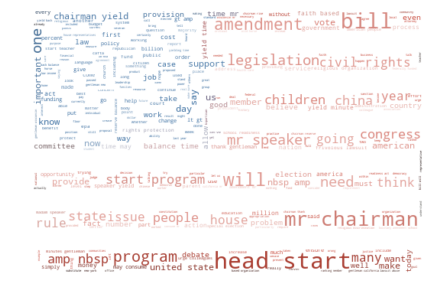

In [41]:
#flag, we can easily make word clouds of the different parties speeches
mask = np.array(Image.open("../data/img/us.png"))
wordcloud_usa = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [51]:
#stemming and tokenization
"""
For future reference, since we might need to do a sentence level tokenization, then pass those through a word tokenizer,
and then do stemming and lemmatization on a list of lists. Reread the recurrent neural network paper and see how they did the 
sentence level classificiation of bias
"""
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
porter=PorterStemmer()

exampleSpeech = df.iloc[0]['Speech']

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

exampleStem=stemSentence(exampleSpeech)

In [55]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


In [45]:
#Everything else, remove stop words, remove puncuation, all lowercase, remove sparse terms